In [ ]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Spotify Data Preparation for time

## Json to CSV format conversation

In [ ]:
import json
import pandas as pd
from google.colab import files

# Step 1: Upload JSON files
uploaded = files.upload()  # Upload all JSON files

# Step 2: Read and combine JSON files into a single DataFrame
combined_data = []

for file_name in uploaded.keys():
    with open(file_name, 'r') as file:
        json_data = json.load(file)  # Load JSON file
        combined_data.extend(json_data)  # Extend the list with the new data

# Step 3: Convert combined data to a DataFrame
spotify_data_combined = pd.DataFrame(combined_data)

# Step 4: Analyze the combined DataFrame
def analyze_spotify_history_with_date_interval(df):
    """
    Analyze Spotify streaming history and determine date coverage interval.

    Parameters:
    df (pd.DataFrame): DataFrame containing Spotify streaming history with columns
                       ['endTime', 'artistName', 'trackName', 'msPlayed'].

    Returns:
    dict: Summary statistics and insights from the data.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")

    if not {'endTime', 'artistName', 'trackName', 'msPlayed'}.issubset(df.columns):
        raise ValueError("DataFrame must include 'endTime', 'artistName', 'trackName', and 'msPlayed' columns.")

    # Convert endTime to datetime if not already
    df['endTime'] = pd.to_datetime(df['endTime'])

    # Add a column for date (without time)
    df['date'] = df['endTime'].dt.date

    # Convert msPlayed to minutes for readability
    df['minutesPlayed'] = df['msPlayed'] / 60000

    # Date coverage interval
    date_coverage = (df['date'].min(), df['date'].max())

    # Total playtime in minutes
    total_minutes = df['minutesPlayed'].sum()

    # Most played artist
    most_played_artist = df.groupby('artistName')['msPlayed'].sum().idxmax()

    # Most played track
    most_played_track = df.groupby(['artistName', 'trackName'])['msPlayed'].sum().idxmax()

    # Playtime by artist
    playtime_by_artist = df.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending=False)

    # Playtime by track
    playtime_by_track = df.groupby(['artistName', 'trackName'])['minutesPlayed'].sum().sort_values(ascending=False)

    # Playtime by day
    playtime_by_day = df.groupby('date')['minutesPlayed'].sum().sort_values(ascending=False)

    return {
        "date_coverage": date_coverage,
        "total_minutes": total_minutes,
        "most_played_artist": most_played_artist,
        "most_played_track": most_played_track,
        "playtime_by_artist": playtime_by_artist,
        "playtime_by_track": playtime_by_track,
        "playtime_by_day": playtime_by_day,
    }

# Analyze combined data
summary_with_date_interval = analyze_spotify_history_with_date_interval(spotify_data_combined)

# Display summary insights including date coverage
for key, value in summary_with_date_interval.items():
    print(f"{key}: {value}")


KeyboardInterrupt: 

In [ ]:
# Ensure 'endTime' is in datetime format
spotify_data_combined['endTime'] = pd.to_datetime(spotify_data_combined['endTime'])

# Create or reassign the 'date' column as a datetime object
spotify_data_combined['date'] = pd.to_datetime(spotify_data_combined['date'], errors='coerce')


In [ ]:
# Filter for rows where the 'date' column falls in the year 2024
spotify_data_combined_2024 = spotify_data_combined[spotify_data_combined['date'].dt.year == 2024]

# Verify the filtered data
spotify_data_combined_2024.head()


,endTime,artistName,trackName,msPlayed,date,minutesPlayed
784,2024-01-01 16:21:00,Kanye West,Father Stretch My Hands Pt. 1,135920,2024-01-01,2.265333
785,2024-01-01 16:25:00,Kanye West,Flashing Lights,237506,2024-01-01,3.958433
786,2024-01-01 16:29:00,Kanye West,Bound 2,229146,2024-01-01,3.819100
787,2024-01-01 16:31:00,310babii,Soak City (Do it),123547,2024-01-01,2.059117
788,2024-01-01 16:34:00,Eslabon Armado,Ella Baila Sola,165671,2024-01-01,2.761183


In [ ]:
spotify_data_combined_2024.tail()

,endTime,artistName,trackName,msPlayed,date,minutesPlayed
41536,2024-12-26 17:18:00,dreamsoda,Good For You x One Of The Girls,149174,2024-12-26,2.486233
41537,2024-12-26 17:20:00,Treyvik,Music to Watch Boys To x I Wanna Be Yours,142222,2024-12-26,2.370367
41538,2024-12-26 17:24:00,Lexz,I Wanna Be Yours - Slowed,200836,2024-12-26,3.347267
41539,2024-12-26 17:30:00,Lana Del Rey,Sad Girl,317760,2024-12-26,5.296000
41540,2024-12-26 17:34:00,Saint Avangeline,Lilith,255709,2024-12-26,4.261817


In [ ]:
rows, columns = spotify_data_combined_2024.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 40757, Number of columns: 6


I download my data as a csv to open it directly for next steps

In [ ]:
import pandas as pd
from google.colab import files

# Save the combined DataFrame to a CSV file
output_file_name = "EceKirmizigul_spotify_data_2024.csv"
spotify_data_combined.to_csv(output_file_name, index=False)

# Download the CSV file
files.download(output_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_name = "EceKirmizigul_spotify_data_2024.csv"  # Replace with the actual file name
data_from_csv = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print(data_from_csv.head())

               endTime          artistName                 trackName  \
0  2023-11-07 12:38:00  Soner Sarıkabadayı                 Kendileri   
1  2023-11-16 08:33:00        Lana Del Rey          The Blackest Day   
2  2023-12-22 21:41:00         Gökhan Özen            Benden Sorulur   
3  2023-12-25 10:24:00            Gazapizm                   Olur Mu   
4  2023-12-26 08:07:00     Michael Jackson  They Don't Care About Us   

   msPlayed        date  minutesPlayed  
0    113655  2023-11-07       1.894250  
1       304  2023-11-16       0.005067  
2     14380  2023-12-22       0.239667  
3     26925  2023-12-25       0.448750  
4     48181  2023-12-26       0.803017  


In [ ]:
my_spotify_data = data_from_csv.copy()

check for succes precious steps

In [ ]:
# Ensure 'endTime' is in datetime format
my_spotify_data['endTime'] = pd.to_datetime(my_spotify_data['endTime'])

# Create or reassign the 'date' column as a datetime object
my_spotify_data['date'] = pd.to_datetime(my_spotify_data['date'], errors='coerce')

# Filter for rows where the 'date' column falls in the year 2024
my_spotify_data = my_spotify_data[my_spotify_data['date'].dt.year == 2024]

# Verify the filtered data
my_spotify_data.head()

,endTime,artistName,trackName,msPlayed,date,minutesPlayed
784,2024-01-01 16:21:00,Kanye West,Father Stretch My Hands Pt. 1,135920,2024-01-01,2.265333
785,2024-01-01 16:25:00,Kanye West,Flashing Lights,237506,2024-01-01,3.958433
786,2024-01-01 16:29:00,Kanye West,Bound 2,229146,2024-01-01,3.819100
787,2024-01-01 16:31:00,310babii,Soak City (Do it),123547,2024-01-01,2.059117
788,2024-01-01 16:34:00,Eslabon Armado,Ella Baila Sola,165671,2024-01-01,2.761183


In [ ]:
rows, columns = my_spotify_data.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 40757, Number of columns: 6


## Visualing my Spotify Data

### Top Artists by Playtime

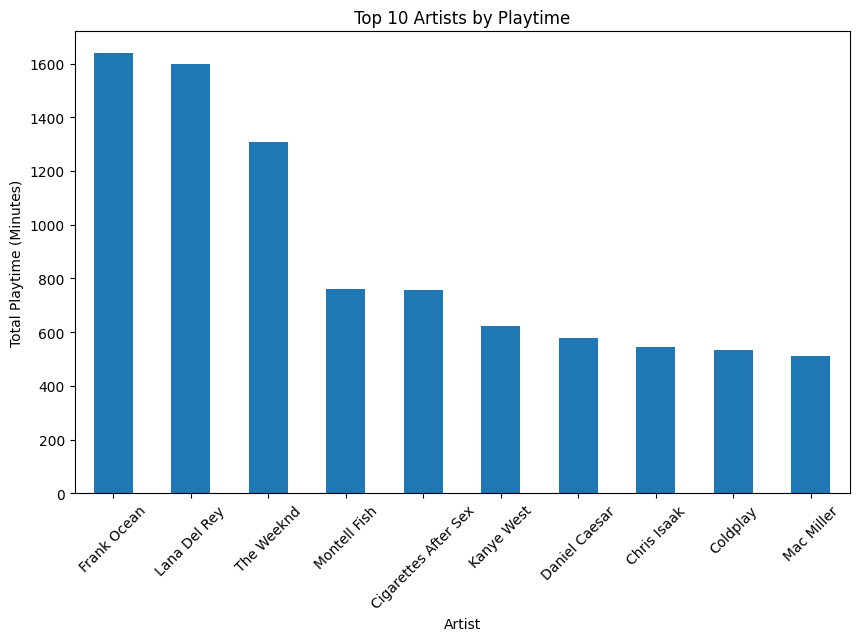

In [ ]:
import matplotlib.pyplot as plt

# Aggregate playtime by artist
top_artists = my_spotify_data.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists by Playtime')
plt.xlabel('Artist')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=45)
plt.show()


### Top Tracks by Playtime

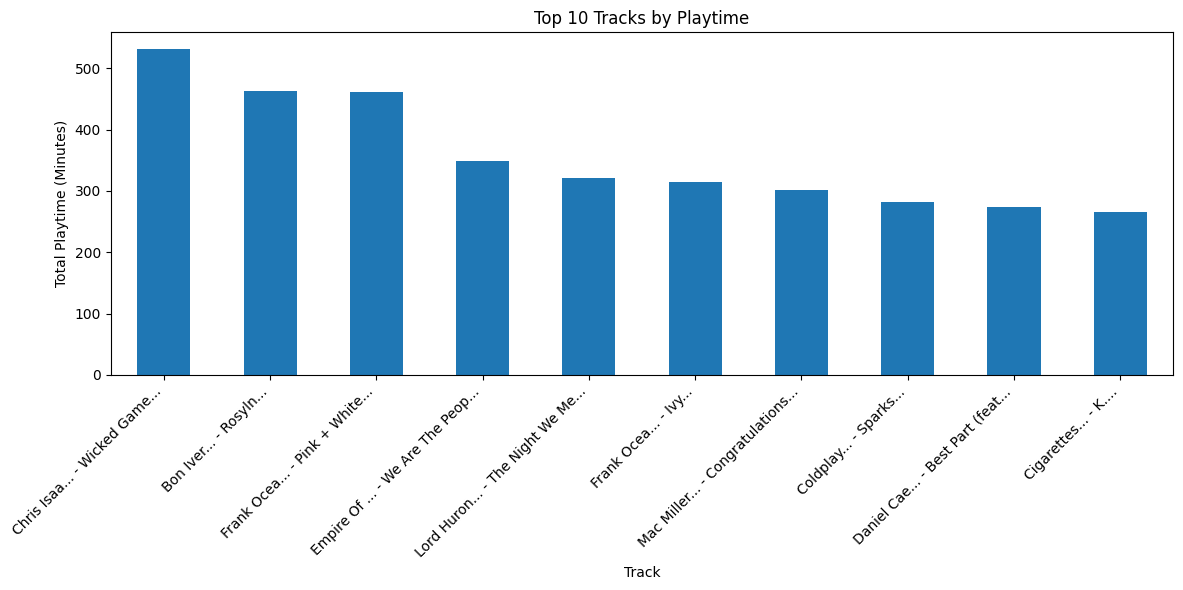

In [ ]:
# Aggregate playtime by track
top_tracks = my_spotify_data.groupby(['artistName', 'trackName'])['minutesPlayed'].sum().sort_values(ascending=False).head(10)

# Shorten labels for readability
top_tracks.index = [f"{artist[:10]}... - {track[:15]}..." for artist, track in top_tracks.index]

# Plot the data
plt.figure(figsize=(12, 6))
top_tracks.plot(kind='bar')
plt.title('Top 10 Tracks by Playtime')
plt.xlabel('Track')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()


###  Listening Trends Over Time

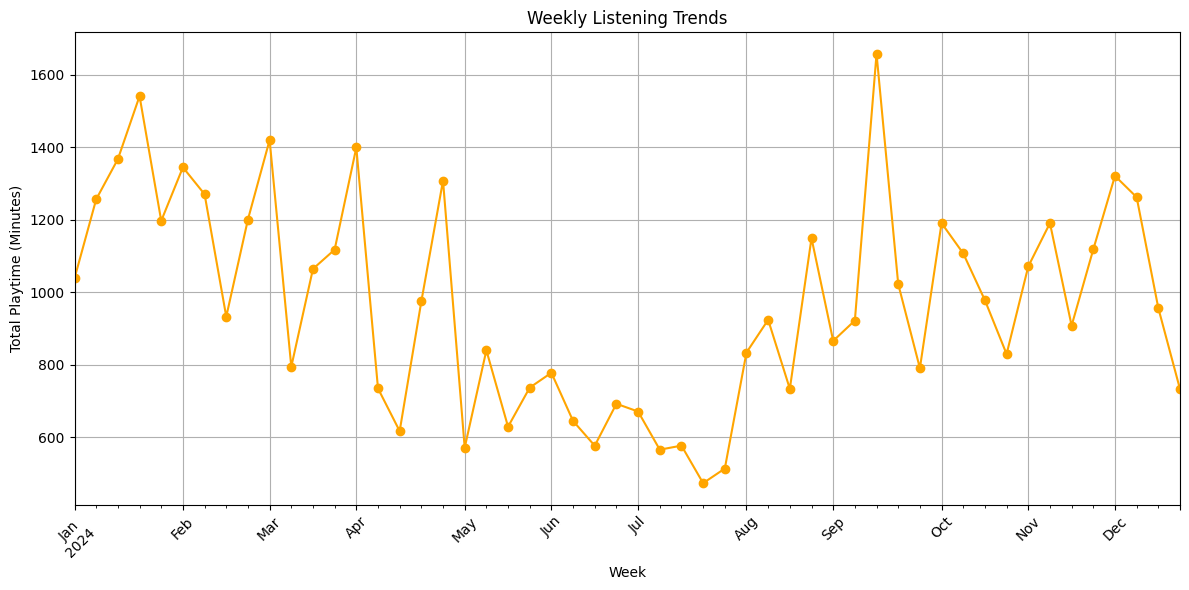

In [ ]:
# Aggregate playtime by week
my_spotify_data['week'] = my_spotify_data['date'] - pd.to_timedelta(my_spotify_data['date'].dt.weekday, unit='d')  # Start of the week
playtime_by_week = my_spotify_data.groupby('week')['minutesPlayed'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
playtime_by_week.plot(kind='line', marker='o', color='orange')
plt.title('Weekly Listening Trends')
plt.xlabel('Week')
plt.ylabel('Total Playtime (Minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Playtime by Hour of Day

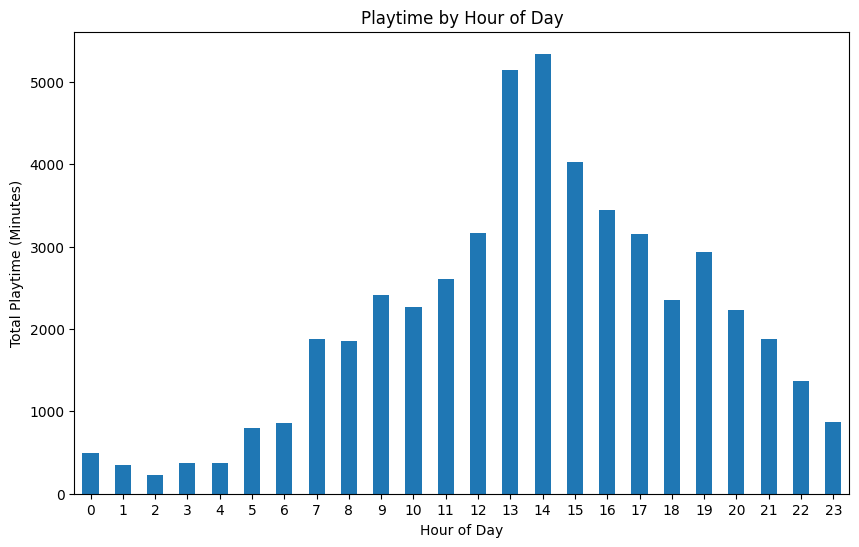

In [ ]:
# Add a column for hour of day
my_spotify_data['hour'] = my_spotify_data['endTime'].dt.hour

# Aggregate playtime by hour
playtime_by_hour = my_spotify_data.groupby('hour')['minutesPlayed'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
playtime_by_hour.plot(kind='bar')
plt.title('Playtime by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=0)
plt.show()


### Listening Habits by Day of the Week

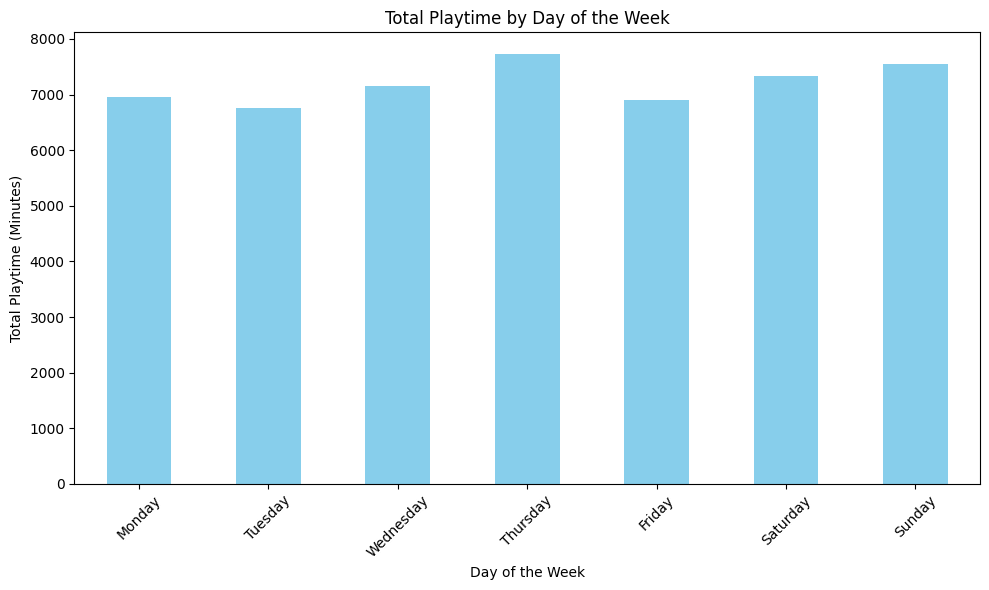

In [ ]:
# Add a column for the day of the week
my_spotify_data['day_of_week'] = my_spotify_data['date'].dt.day_name()

# Aggregate playtime by day of the week
playtime_by_day = my_spotify_data.groupby('day_of_week')['minutesPlayed'].sum()

# Reorder days for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
playtime_by_day = playtime_by_day.reindex(days_order)

# Plot the data
plt.figure(figsize=(10, 6))
playtime_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Playtime by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Listening Habits by Month

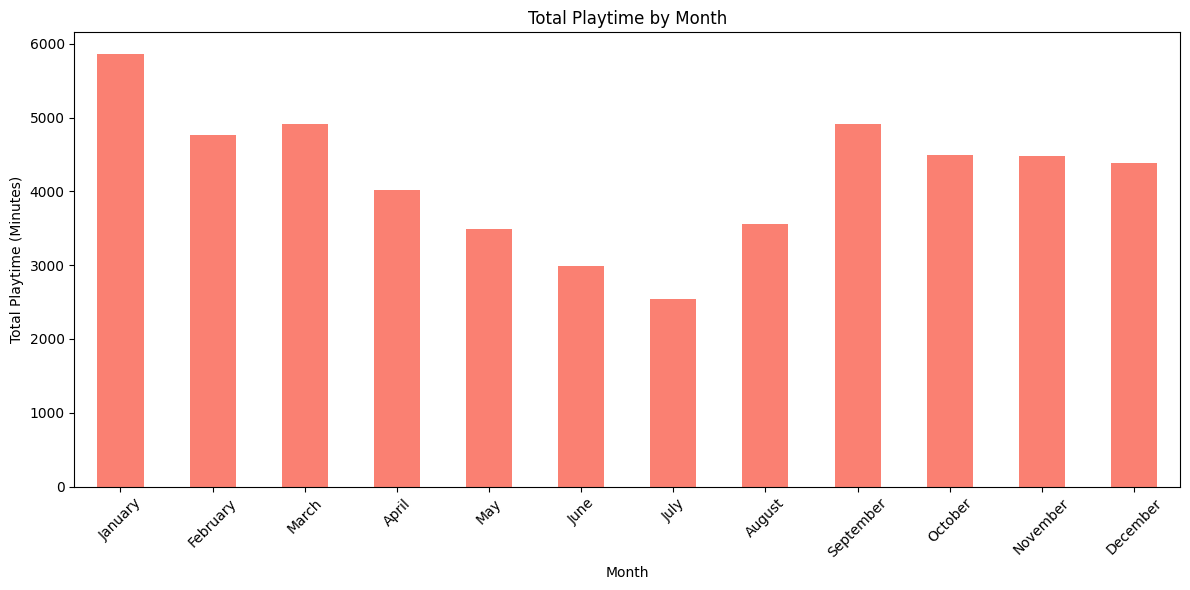

In [ ]:
# Aggregate playtime by month
my_spotify_data['month'] = my_spotify_data['date'].dt.month_name()
playtime_by_month = my_spotify_data.groupby('month')['minutesPlayed'].sum()

# Reorder months for better readability
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
playtime_by_month = playtime_by_month.reindex(months_order)

# Plot the data
plt.figure(figsize=(12, 6))
playtime_by_month.plot(kind='bar', color='salmon')
plt.title('Total Playtime by Month')
plt.xlabel('Month')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Daily Listening Times

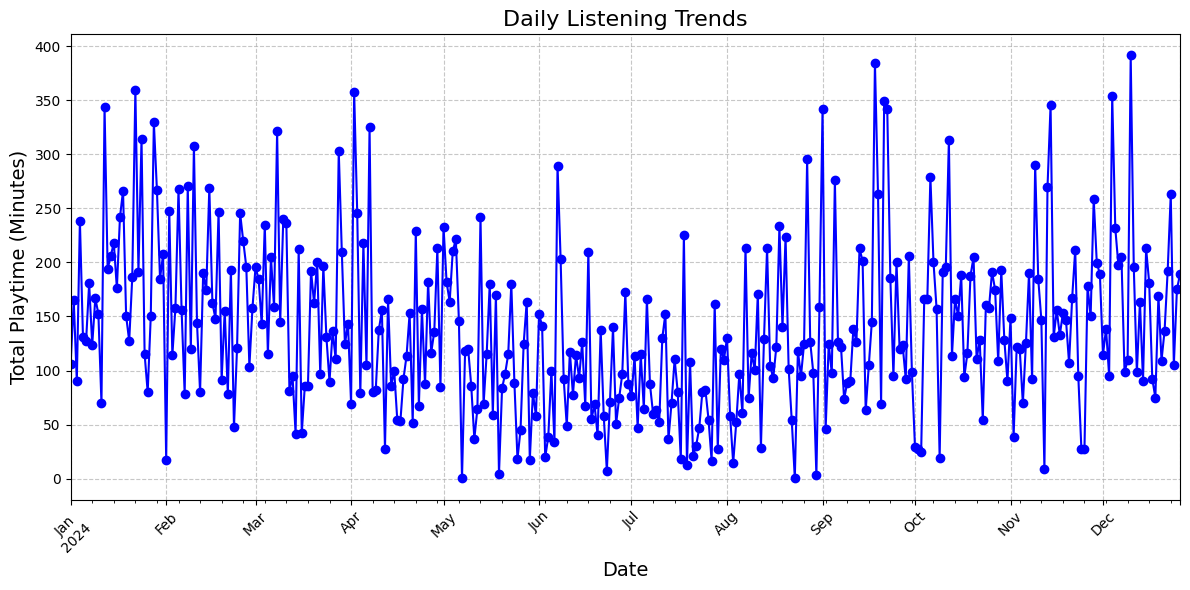

In [ ]:
# Group data by date and sum minutesPlayed for each day
playtime_by_day = my_spotify_data.groupby('date')['minutesPlayed'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
playtime_by_day.plot(kind='line', marker='o', color='blue')
plt.title('Daily Listening Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Playtime (Minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


# Step Count Data Preparation

## XML to CSV format Conversation

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
from dateutil.parser import parse

# Load and parse the XML file
file_path = "export.xml"  # Make sure the file is uploaded or located in your working directory
tree = ET.parse(file_path)
root = tree.getroot()

# Extract the 'Record' elements (specific to Apple Health data structure)
step_data = []
for record in root.findall(".//Record"):
    if record.attrib.get('type') == 'HKQuantityTypeIdentifierStepCount':
        date = record.attrib.get('startDate')  # Get the startDate attribute
        count = record.attrib.get('value')    # Get the value attribute

        # Filter for the year 2024
        if date and parse(date).year == 2024:
            step_data.append({
                'Date': date,
                'Step Count': int(count)
            })

# Convert to a DataFrame for easier manipulation and visualization
df = pd.DataFrame(step_data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and sum step counts
daily_steps = df.groupby(df['Date'].dt.date)['Step Count'].sum().reset_index()
daily_steps.rename(columns={'Date': 'Day'}, inplace=True)

# Display the DataFrame in Colab
print(daily_steps)

# Save to CSV if needed
daily_steps.to_csv("EceKirmizigul_daily_steps_data_2024.csv", index=False)
print("Step count data for 2024 saved as 'EceKirmizigul_daily_steps_data_2024.csv'")


KeyboardInterrupt: 

## Visualize my Step Count Data

### Step Count Trends Over Time

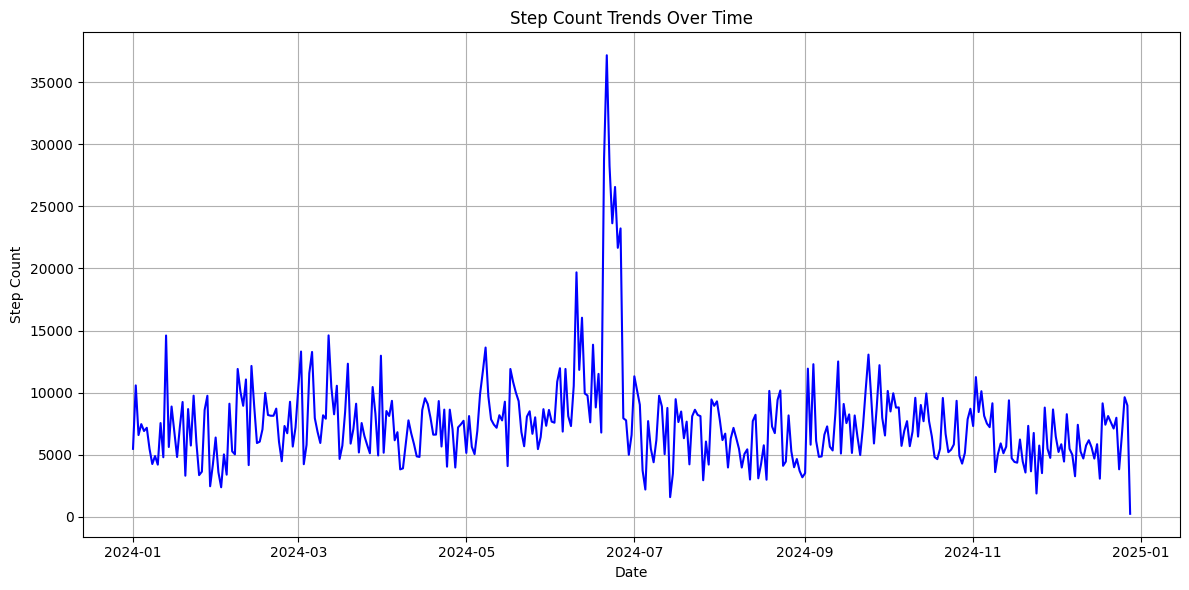

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read step count data
step_data = pd.read_csv('EceKirmizigul_daily_steps_data_2024.csv', parse_dates=['Day'])

# Plot step count over time
plt.figure(figsize=(12, 6))
plt.plot(step_data['Day'], step_data['Step Count'], label='Daily Steps', color='blue')
plt.title('Step Count Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.grid(True)
plt.tight_layout()
plt.show()


### Step Count by Day of the Week


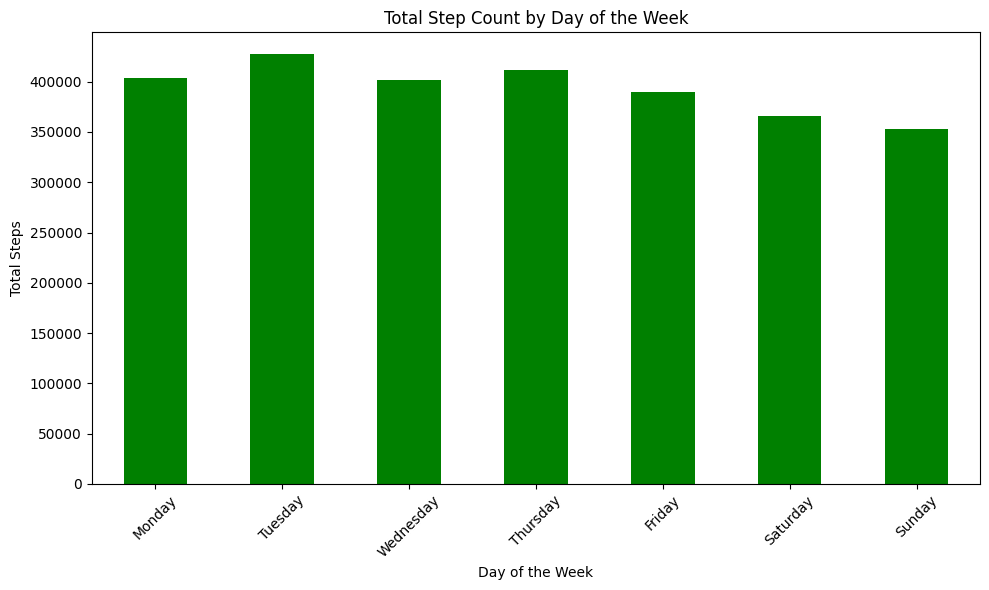

In [ ]:
# Add a column for the day of the week
step_data['Day of Week'] = step_data['Day'].dt.day_name()

# Aggregate step counts by day of the week
steps_by_day = step_data.groupby('Day of Week')['Step Count'].sum()

# Reorder days for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
steps_by_day = steps_by_day.reindex(days_order)

# Plot step count by day of the week
plt.figure(figsize=(10, 6))
steps_by_day.plot(kind='bar', color='green')
plt.title('Total Step Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Step Count Distribution by Month

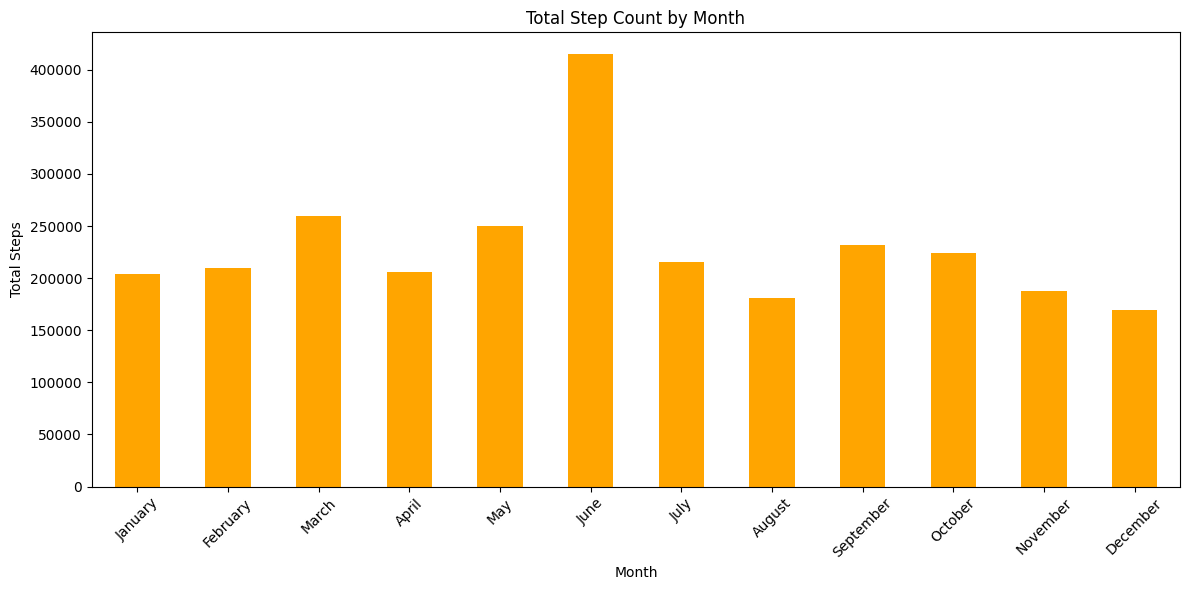

In [ ]:
# Add a column for the month
step_data['Month'] = step_data['Day'].dt.month_name()

# Aggregate step counts by month
steps_by_month = step_data.groupby('Month')['Step Count'].sum()

# Reorder months for better readability
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
steps_by_month = steps_by_month.reindex(months_order)

# Plot step count by month
plt.figure(figsize=(12, 6))
steps_by_month.plot(kind='bar', color='orange')
plt.title('Total Step Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step Count Distribution

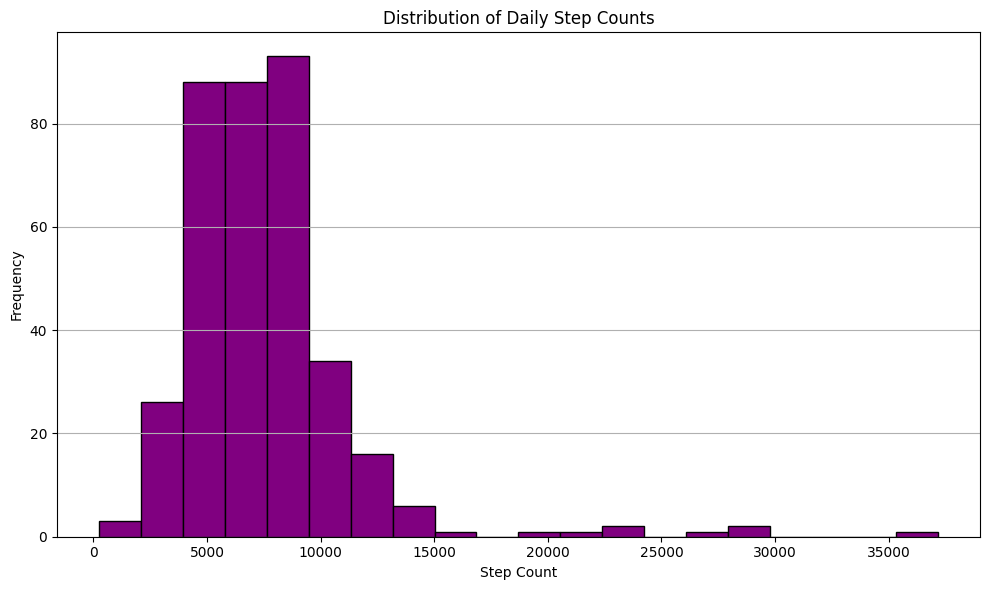

In [ ]:
# Plot histogram of daily step counts
plt.figure(figsize=(10, 6))
plt.hist(step_data['Step Count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Daily Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Active vs. Sedentary Days

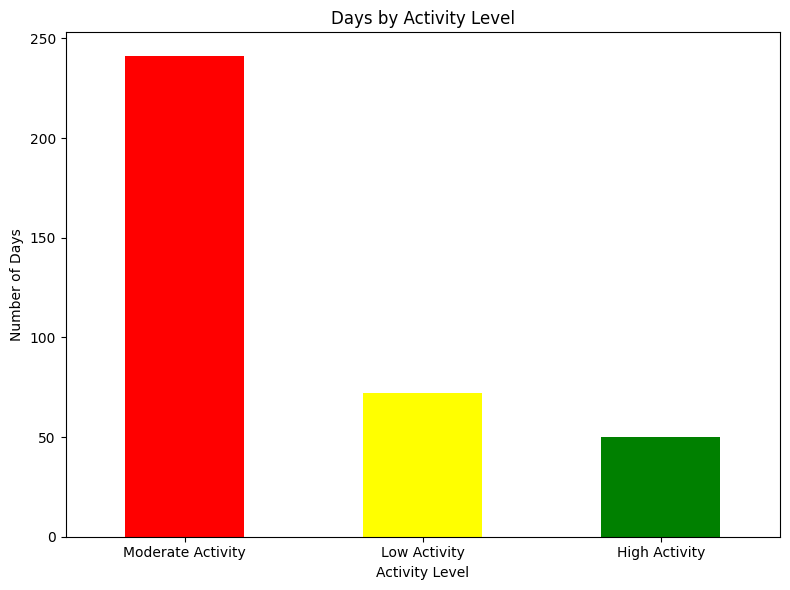

In [ ]:
# Categorize days
step_data['Activity Level'] = pd.cut(
    step_data['Step Count'],
    bins=[0, 5000, 10000, float('inf')],
    labels=['Low Activity', 'Moderate Activity', 'High Activity']
)

# Count days by activity level
activity_levels = step_data['Activity Level'].value_counts()

# Plot active vs sedentary days
plt.figure(figsize=(8, 6))
activity_levels.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Days by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Number of Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Cumulative Step Count


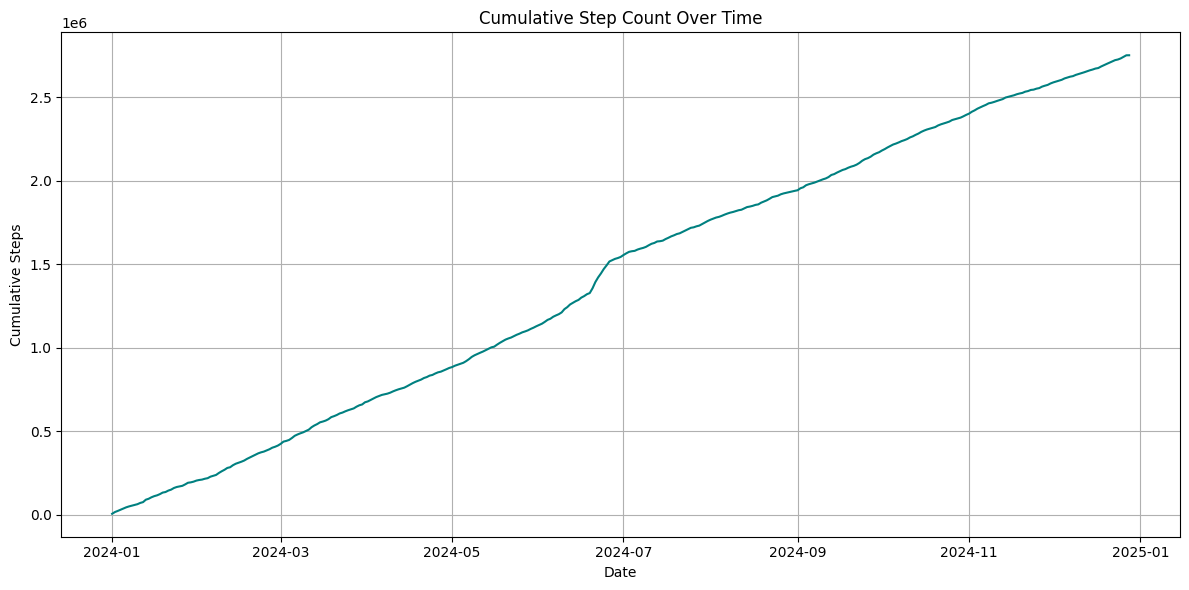

In [ ]:
# Calculate cumulative step count
step_data['Cumulative Steps'] = step_data['Step Count'].cumsum()

# Plot cumulative steps over time
plt.figure(figsize=(12, 6))
plt.plot(step_data['Day'], step_data['Cumulative Steps'], color='teal', label='Cumulative Steps')
plt.title('Cumulative Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Steps')
plt.grid(True)
plt.tight_layout()
plt.show()


# Merging the data and scaling them

## Merging

In [ ]:
# Assuming both datasets have a 'date' column (datetime format)
spotify_daily = my_spotify_data.groupby('date')['minutesPlayed'].sum().reset_index()
step_data['date'] = step_data['Day']  # Rename for consistency

# Merge the datasets
merged_data = pd.merge(spotify_daily, step_data[['date', 'Step Count']], on='date', how='inner')

# Display the merged dataset
print(merged_data.head())


        date  minutesPlayed  Step Count
0 2024-01-01     106.206867        5472
1 2024-01-02     165.260600       10582
2 2024-01-03      89.845183        6583
3 2024-01-04     238.743983        7462
4 2024-01-05     130.788683        6907


##  Scaling the Data


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler = MinMaxScaler()
merged_data[['minutesPlayed_scaled', 'Step Count_scaled']] = scaler.fit_transform(
    merged_data[['minutesPlayed', 'Step Count']]
)

# Standard Scaling
standard_scaler = StandardScaler()
merged_data[['minutesPlayed_standard', 'Step Count_standard']] = standard_scaler.fit_transform(
    merged_data[['minutesPlayed', 'Step Count']]
)

# Display scaled data
print(merged_data.head())


        date  minutesPlayed  Step Count  minutesPlayed_scaled  \
0 2024-01-01     106.206867        5472              0.271065   
1 2024-01-02     165.260600       10582              0.421898   
2 2024-01-03      89.845183        6583              0.229275   
3 2024-01-04     238.743983        7462              0.609587   
4 2024-01-05     130.788683        6907              0.333851   

   Step Count_scaled  minutesPlayed_standard  Step Count_standard  
0           0.109294               -0.426202            -0.559900  
1           0.252866                0.327214             0.785276  
2           0.140509               -0.634947            -0.267436  
3           0.165206                1.264726            -0.036045  
4           0.149612               -0.112584            -0.182145  


After that step we will use scaled units

In [ ]:
merged_data = merged_data[['date','minutesPlayed_scaled', 'Step Count_scaled']]

In [ ]:
merged_data.rename(columns={'minutesPlayed_scaled': 'minutesPlayed', 'Step Count_scaled': 'Step Count'}, inplace=True)

<ipython-input-138-4b0a71725d58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.rename(columns={'minutesPlayed_scaled': 'minutesPlayed', 'Step Count_scaled': 'Step Count'}, inplace=True)


In [ ]:
print(merged_data.head())


        date  minutesPlayed  Step Count
0 2024-01-01       0.271065    0.109294
1 2024-01-02       0.421898    0.252866
2 2024-01-03       0.229275    0.140509
3 2024-01-04       0.609587    0.165206
4 2024-01-05       0.333851    0.149612


##  Investigating the Connection

### Correlation Analysis

In [ ]:
# Calculate correlation
correlation = merged_data[['minutesPlayed', 'Step Count']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
               minutesPlayed  Step Count
minutesPlayed       1.000000   -0.153559
Step Count         -0.153559    1.000000


### Scatter Plot

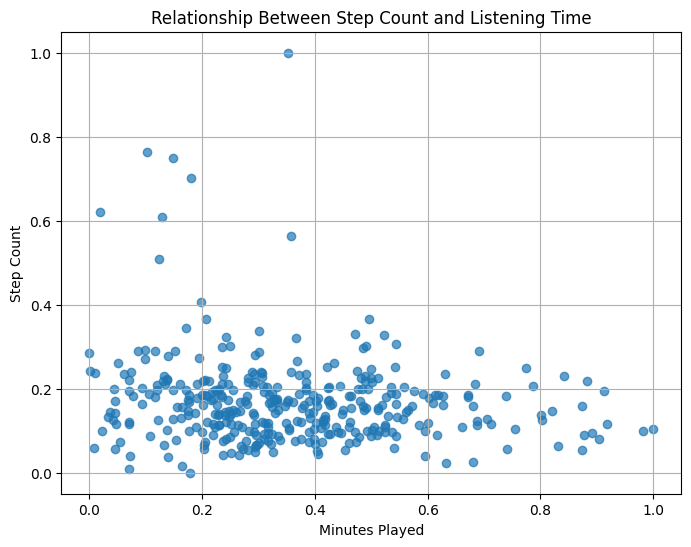

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['minutesPlayed'], merged_data['Step Count'], alpha=0.7)
plt.title('Relationship Between Step Count and Listening Time')
plt.xlabel('Minutes Played')
plt.ylabel('Step Count')
plt.grid(True)
plt.show()


### Trend Over Time

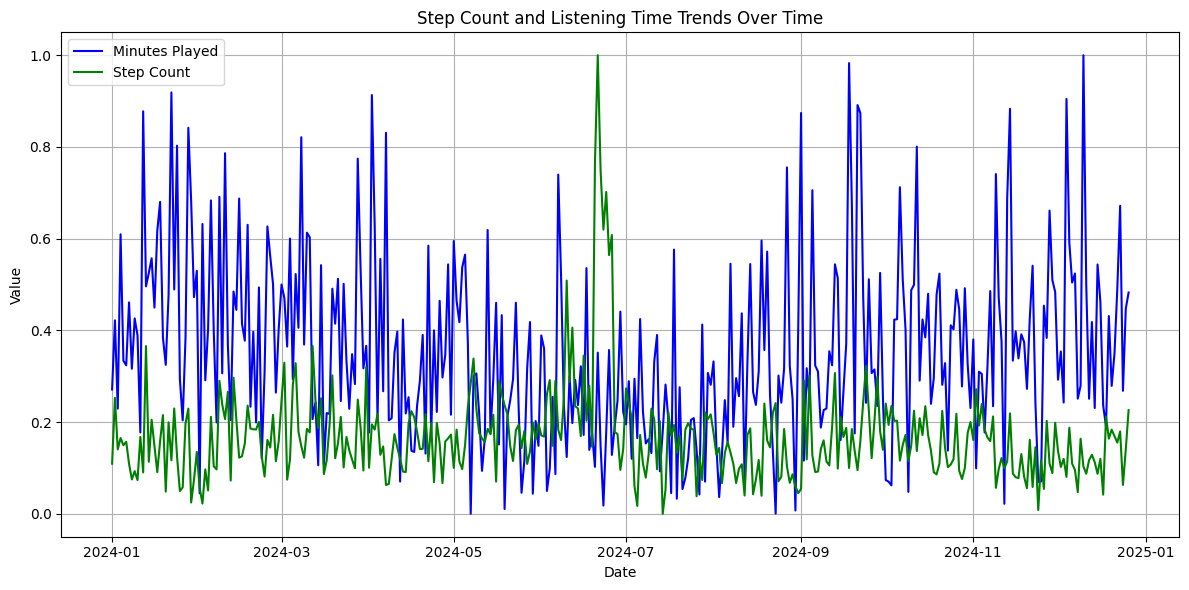

In [ ]:
# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['minutesPlayed'], label='Minutes Played', color='blue')
plt.plot(merged_data['date'], merged_data['Step Count'], label='Step Count', color='green')
plt.title('Step Count and Listening Time Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Hypothesis Testing & Linear Regression

## Hypothesis Testing

Null Hypothesis (H₀): There is no correlation between step count and listening minutes.
Alternative Hypothesis (H₁): There is a significant correlation between step count and listening minutes.


In [ ]:
from scipy.stats import pearsonr

# Pearson Correlation Test
pearson_corr, pearson_p = pearsonr(merged_data['minutesPlayed'], merged_data['Step Count'])
print(f"Pearson Correlation: {pearson_corr}, P-value: {pearson_p}")


Pearson Correlation: -0.15355947798840258, P-value: 0.0034459126750755625


### Correlation Analysis: Step Count vs. Listening Minutes

The relationship between step count and listening minutes was analyzed using both Pearson tests.

- **Pearson Correlation:**  
  - Correlation Coefficient (\(r\)): \(-0.1536\)  
  - P-value: \(0.0034\)  
  - Interpretation: Indicates a weak negative but statistically significant correlation.

### Conclusion:
The test reveal a statistically significant relationship, but the weak correlation suggests minimal connection between step count and listening minutes. Other factors are likely to have a stronger influence on these variables.


## Linear Regression: Step Count vs. Listening Minutes

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

from sklearn.utils import shuffle


In [ ]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = merged_data['minutesPlayed']
y = merged_data['Step Count']

# Add a constant to include the intercept in the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Step Count   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     8.670
Date:                Mon, 30 Dec 2024   Prob (F-statistic):            0.00345
Time:                        23:24:54   Log-Likelihood:                 299.79
No. Observations:                 361   AIC:                            -595.6
Df Residuals:                     359   BIC:                            -587.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1982      0.011     17.442

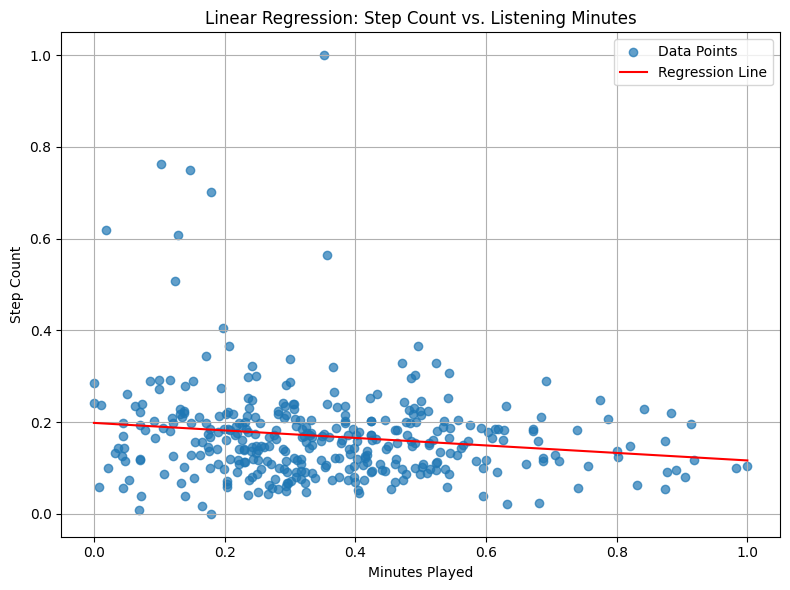

In [ ]:
# Scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['minutesPlayed'], merged_data['Step Count'], alpha=0.7, label='Data Points')

# Regression line
slope = model.params['minutesPlayed']
intercept = model.params['const']
x_vals = np.linspace(merged_data['minutesPlayed'].min(), merged_data['minutesPlayed'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.title('Linear Regression: Step Count vs. Listening Minutes')
plt.xlabel('Minutes Played')
plt.ylabel('Step Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df = merged_data

df_shuffled = shuffle(df, random_state=42)

# Separate features (X) and target (y)
X = df[['minutesPlayed']].astype(float)
y = df[['Step Count']].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create the decision tree regressor
regressor = RandomForestRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
from math import sqrt


y_pred = regressor.predict(X_test)

mse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1612598135063123


In [ ]:

pred = regressor.predict([[5000]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.11052933])